In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r"C:\Users\12269\Downloads\encoded.csv")

In [4]:
data

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,matched_word
0,4,12060,5,50296,83662,13,-122.406803,37.757763,0
1,4,593,5,26714,227419,15,-122.479590,37.738186,0
2,4,2162,5,22024,227419,82,-122.444524,37.770370,0
3,6,29566,5,43103,227419,72,-122.426995,37.800873,6
4,6,29566,5,22024,227419,25,-122.437159,37.775975,6
...,...,...,...,...,...,...,...,...,...
373984,6,10473,1,70997,227419,332,-122.397814,37.782137,6
373985,5,50,1,50296,2720,68,-122.417665,37.756291,0
373986,2,4048,1,32974,227419,43,-122.403756,37.716710,6
373987,2,3611,1,70997,8798,12029,-122.403405,37.775421,0


In [5]:
X = data.drop(['Category', 'matched_word'], axis=1)
y = data['Category']

In [6]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(X)

# Transform the data using the scaler
X_scaled = scaler.transform(X)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into features (X) and target variable (y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8450359635284366


In [8]:
#Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
n_estimators = [100, 150, 200, 300] # number of trees in the random forest
max_features = ['log2', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}
rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 25, cv = 3, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train,  y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [100, 150, 200, 300]},
                   random_state=35, verbose=2)

In [9]:
rf_random.score(X_test, y_test)

0.8538597288697559

In [11]:
best = rf_random.best_estimator_

In [12]:
y_pred = best.predict(X_test)

<AxesSubplot: >

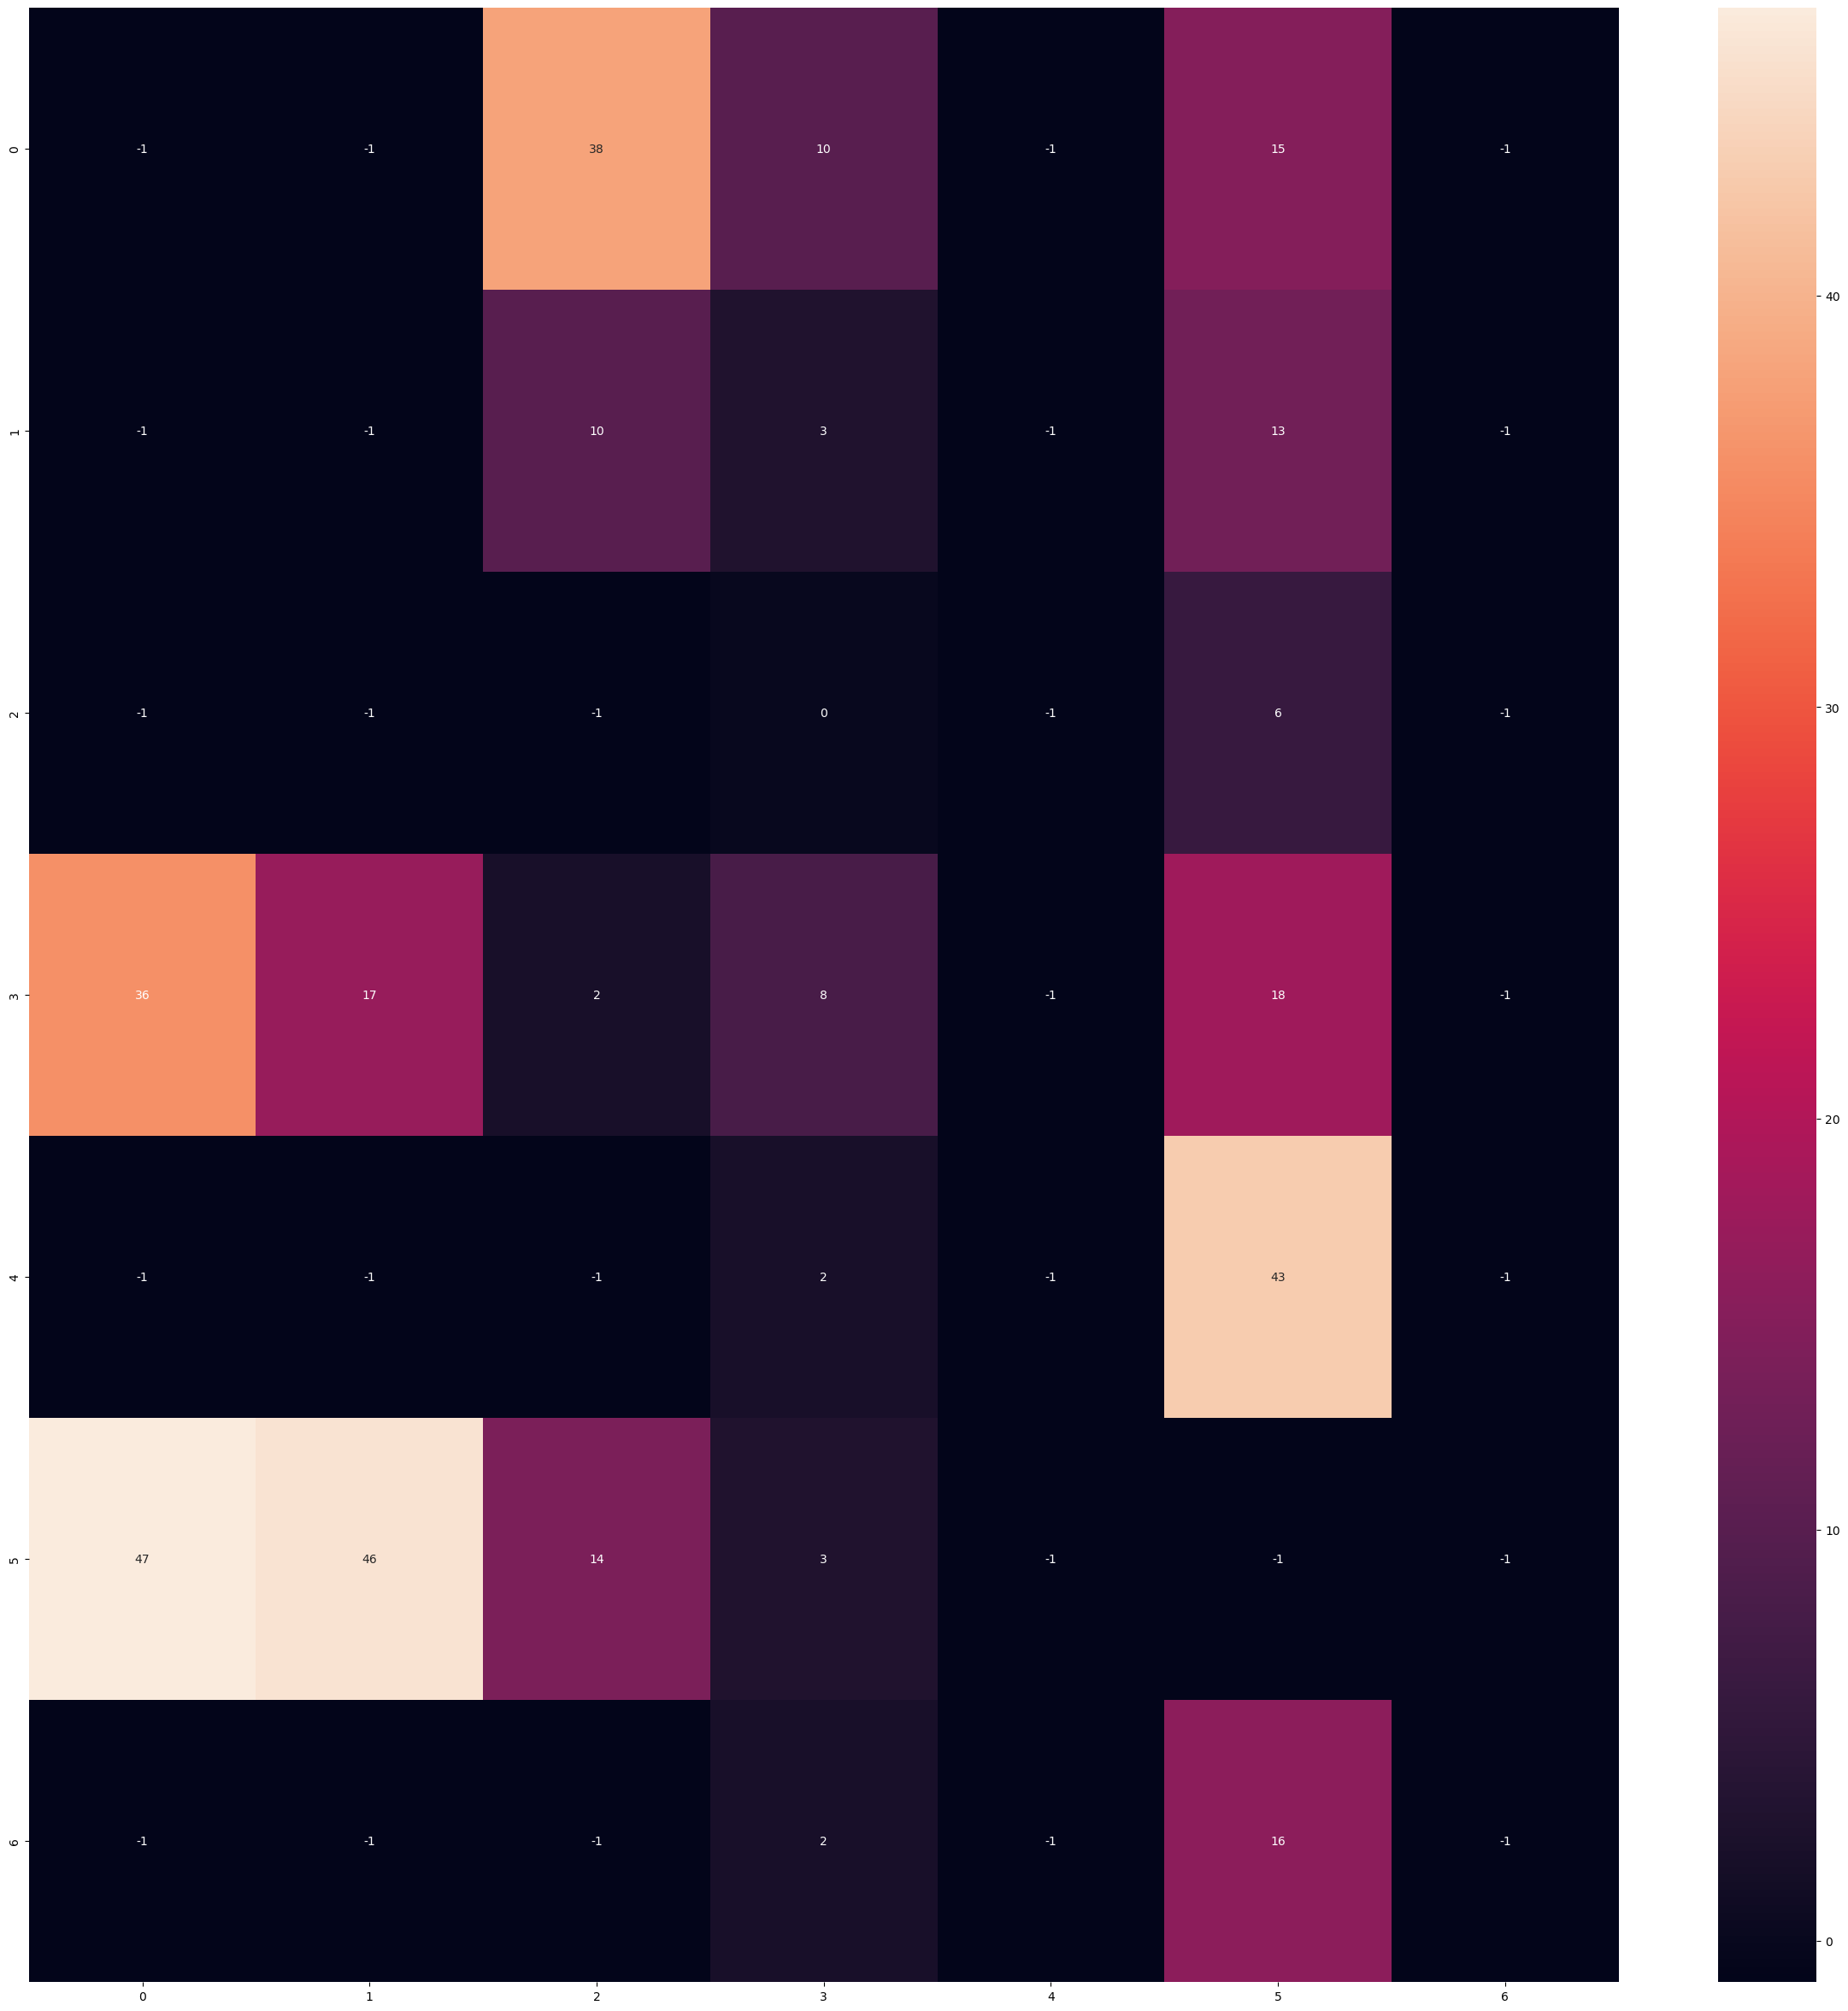

In [13]:
#predicted_classes = np.argmax(predict_x, axis=1)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
cm2 = cm.copy()
cm2[cm2 > 50] = -1
plt.figure(figsize = (30,30))
sn.heatmap(cm2, annot=True)

In [14]:
import tensorflow as tf
encoded = tf.keras.utils.to_categorical(y)

In [15]:
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.models import load_model

# Assume your input data has a shape of (num_samples, num_features)
input_shape = (7,)
num_classes = 7  # Number of classes for classification

# Create a sequential model
model = tf.keras.Sequential()

# Add dense layers
model.add(Dense(4096, activation='relu', input_shape=input_shape))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
# Add output layer
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer with softmax activation for classification

# Compile the model
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',  # Categorical cross-entropy loss for multi-class classification
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', patience=5)
checkpoint = ModelCheckpoint('model_checkpoint.h5', monitor='val_loss',mode = 'min', save_best_only=True)

# Print model summary
model.summary()

X_a, X_val, y_a, y_val = train_test_split(X_scaled, encoded, test_size=0.1, random_state=42)
X_train, X_test,y_train,y_test = train_test_split(X_a, y_a, test_size=0.1, random_state=42)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              32768     
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 4096)              16384     
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384     
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              8

In [16]:
X_train.shape

(302931, 7)

In [17]:
model.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_val, y_val),callbacks=[early_stopping, checkpoint])

Epoch 1/50
1184/1184 [==============================] - 21s 16ms/step - loss: 1.0486 - accuracy: 0.5859 - val_loss: 0.9014 - val_accuracy: 0.6127
Epoch 2/50
1184/1184 [==============================] - 19s 16ms/step - loss: 0.8365 - accuracy: 0.6469 - val_loss: 0.8160 - val_accuracy: 0.6591
Epoch 3/50
1184/1184 [==============================] - 19s 16ms/step - loss: 0.7695 - accuracy: 0.6789 - val_loss: 0.7320 - val_accuracy: 0.6983
Epoch 4/50
1184/1184 [==============================] - 19s 16ms/step - loss: 0.7257 - accuracy: 0.7005 - val_loss: 0.6953 - val_accuracy: 0.6982
Epoch 5/50
1184/1184 [==============================] - 19s 16ms/step - loss: 0.6981 - accuracy: 0.7129 - val_loss: 0.7754 - val_accuracy: 0.6781
Epoch 6/50
1184/1184 [==============================] - 19s 16ms/step - loss: 0.6793 - accuracy: 0.7206 - val_loss: 0.6354 - val_accuracy: 0.7417
Epoch 7/50
1184/1184 [==============================] - 19s 16ms/step - loss: 0.6649 - accuracy: 0.7266 - val_loss: 0.6946 -

In [18]:
best_model = load_model('model_checkpoint.h5')
best_model.evaluate(X_test, y_test)


1052/1052 [==============================] - 2s 2ms/step - loss: 0.6343 - accuracy: 0.7410


[0.6342898011207581, 0.7410499453544617]

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5070590122730554


C:\Users\12269\anaconda3\envs\DAB300\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
